In [4]:
from agentee import Agent
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    best_score = -np.inf
    load_checkpoint = False
    n_games = 5
    agent = Agent(gamma=0.99, epsilon=1, lr=0.0001, input_dims=(env.observation_space.shape), 
                  n_actions=env.action_space.n, mem_size=50000, eps_min=0.1, batch_size=32, replace=1000, 
                  eps_dec=1e-5)

    n_steps = 0
    scores, eps_history, steps_array = [], [], []

    for i in range(n_games):
        done = False
        observation = env.reset()

        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward

            if not load_checkpoint:
                agent.store_transition(observation, action,
                                       reward, observation_, done)
                agent.learn()
            observation = observation_
            n_steps += 1
        scores.append(score)
        steps_array.append(n_steps)

        avg_score = np.mean(scores[-100:])
        
        print(f'episode {i} score {score:.1f} avg score {avg_score:.1f} best score {best_score:.1f} epsilon {agent.epsilon:.2f} steps {n_steps}')
 

        if score > best_score:
            best_score = score

        eps_history.append(agent.epsilon)

    x = [i+1 for i in range(len(scores))]

1/1 [==============================] - 0s 21ms/step
episode 0 score 38.0 avg score 38.0 best score -inf epsilon 1.00 steps 38
1/1 [==============================] - 0s 20ms/step
episode 1 score 21.0 avg score 29.5 best score 38.0 epsilon 1.00 steps 59
1/1 [==============================] - 0s 25ms/step
episode 2 score 16.0 avg score 25.0 best score 38.0 epsilon 1.00 steps 75
1/1 [==============================] - 0s 23ms/step
episode 3 score 18.0 avg score 23.2 best score 38.0 epsilon 1.00 steps 93
1/1 [==============================] - 0s 23ms/step
episode 4 score 14.0 avg score 21.4 best score 38.0 epsilon 1.00 steps 107


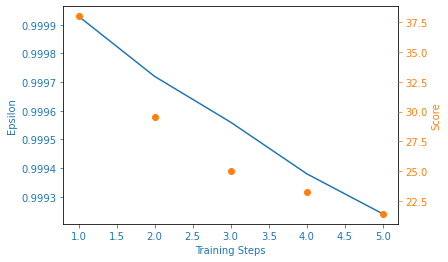

In [5]:
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, eps_history, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")
